### Spectral embedding tests ER graph

In [1]:
%matplotlib inline
%load_ext autoreload
#
from lrgsglib.shared import *
from lrgsglib.config.const import *
from lrgsglib.nx_patches.funcs import signed_spectral_layout
from lrgsglib.core import move_to_rootf,ErdosRenyi
#
move_to_rootf(print_tf=True)
plt.style.use('ipynb/nb_plotsheet.mplstyle')

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


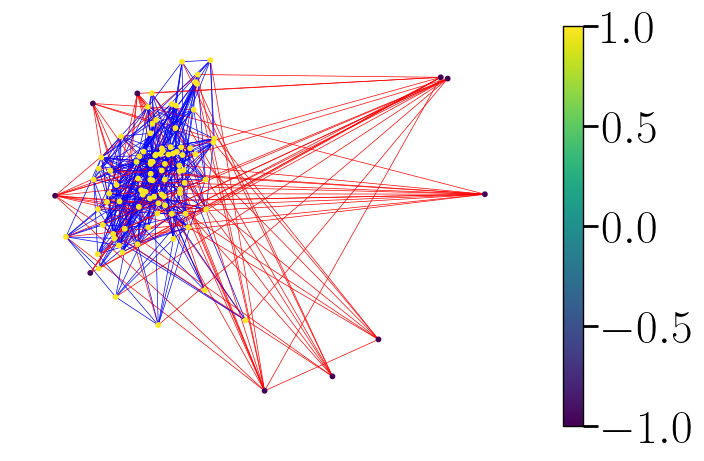

In [ ]:
fig = plt.figure(figsize=(6.5, 4))
er = ErdosRenyi(100, 0.1, pflip=0.1, init_nw_dict=True)
er.flip_sel_edges(er.nwDict['randXERR']['G'])
er.compute_k_eigvV(k=0+1)
er.load_eigV_on_graph(which=0, binarize=True)
er.make_clustersYN(f'eigV{0}', -1)
node_colors =list(er.get_node_attributes('eigV0').values())
nx.draw(er.G, edge_color=er.get_edge_color(), node_color=node_colors, node_size=10,width=0.5)
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  # Dummy array for ScalarMappable
cbar = plt.colorbar(sm, ax=plt.gca())

In [3]:
from graph_tool.draw import graph_draw


In [11]:
import graph_tool.all as gt
from graph_tool.draw import graph_draw
import numpy as np

def generate_erdos_renyi(n, p):
    # n is the number of vertices
    # p is the probability of an edge between any two vertices
    g = gt.random_graph(n, lambda: np.random.poisson(p * (n - 1)),
                        directed=False,
                        model="erdos",
                        n_iter=1)
    return g
n = 10000  # number of vertices
p = 0.1  # probability of an edge
g = generate_erdos_renyi(n, p)

# Optionally, draw the graph
# graph_draw(g, output_size=(500, 500))

In [4]:
ergraph = ErdosRenyi(pflip=0.3, n=10**4, p=0.1, init_nw_dict=False)
ergraph.flip_random_fract_edges()